In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**Описание данных**  
`timestamp` – дата и время (точность до часа)  
`cnt` – количество аренд велосипедов за этот час    
`t1` – температура, в С  
`t2` – температура "ощущается как", в С   
`hum` – влажность (%)  
`wind_speed` – скорость ветра, км/ч  
`weather_code` – погодные условия:  
1 – ясно (SKC)  
2 – преимущественно ясно / встречаются отдельные облака (SCT)  
3 – облачно / значительные облака (BKN)  
4 – пасмурно (OVC)  
7 – небольшой дождь Rain/ light Rain shower/ Light rain   
10 – дождь с грозой  
26 – снегопад   
94 – ледяной туман (да, такое бывает!)  
`isholiday` – является ли день праздником (1 – праздник, 0 – нет)  
`isweekend` –  является ли день выходным (1 – выходной, 0 – нет)  
`season` – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)  

In [62]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-da-chernova/Stats/lesson3/london.csv')

### Задание 1

Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

In [63]:
df.shape

(17414, 10)

In [64]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [65]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [66]:
df.timestamp = pd.to_datetime(df.timestamp)


In [67]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

### Задание 2

Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:

по оси x – дата (timestamp)
по оси y – число поездок (cnt)

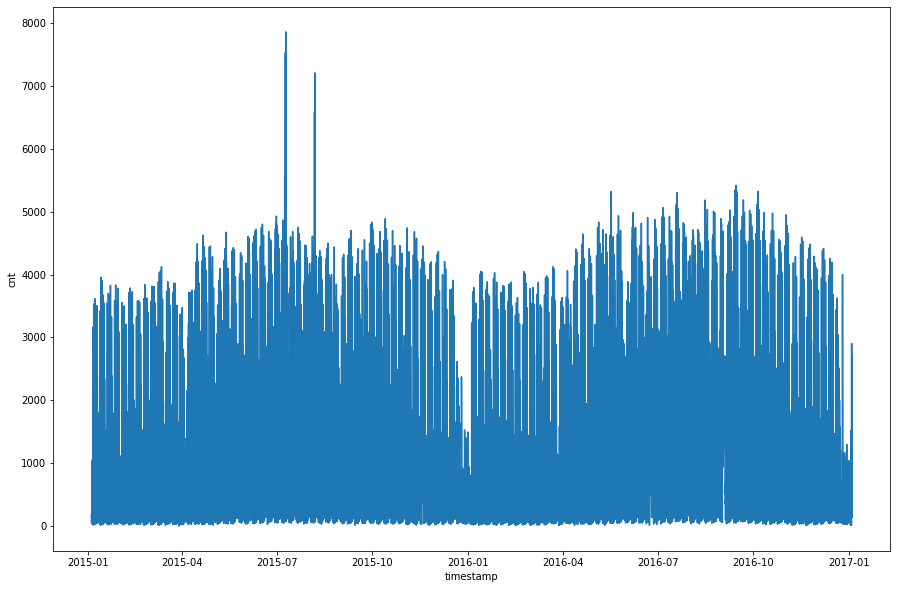

In [68]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = df, x='timestamp', y='cnt')

Отлично! Предположим, что данные действительно нужно немного преобразовать. В этом нам поможет resample. Этот метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum). Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут. Например, посчитать сумму показателя по дням, имея данные по часам, можно следующим образом:

`data.resample(rule='D').column_name.sum() #способ 1
data.resample(rule='D').agg({'column_name':'sum'}) #способ 2, эквивалентный предыдущему`

Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?

In [69]:
df_date_index = df.set_index('timestamp')
df_date_index

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


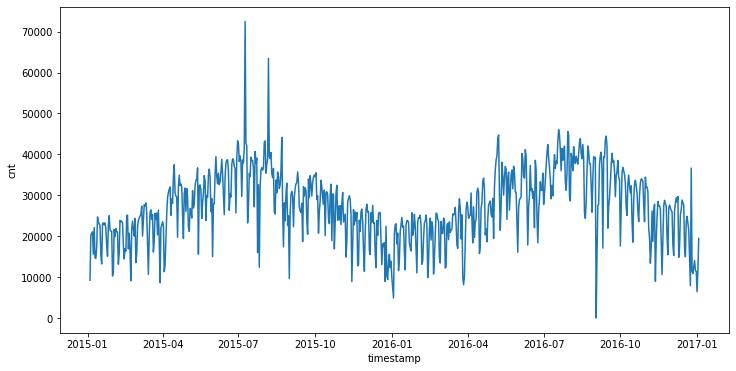

In [70]:
plt.figure(figsize=(12, 6))
sns.lineplot(data = df_date_index.resample(rule='D').sum(), x='timestamp', y='cnt')


In [73]:
df_resample.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.00000
mean,27231.151847,297.016872,274.451208,1722.936731,379.083561,64.861833,0.525308,6.798906,35.54446
std,8660.727499,123.313556,147.335578,247.655014,146.473615,29.751690,3.514019,10.772583,26.79898
min,0.000000,0.000000,-57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,21912.000000,203.750000,154.000000,1562.250000,268.000000,41.000000,0.000000,0.000000,0.00000
50%,27001.000000,298.000000,294.000000,1733.500000,362.500000,62.000000,0.000000,0.000000,24.00000
75%,33427.500000,388.250000,388.250000,1899.500000,471.000000,82.000000,0.000000,24.000000,48.00000
max,72504.000000,657.000000,658.500000,2368.500000,884.000000,237.000000,24.000000,24.000000,72.00000


In [78]:
df_resample.query('timestamp == "2015-07-09"')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,cnt_roll
186,2015-07-09,72504,427.0,421.0,1175.5,311.5,28.0,0.0,0.0,24.0,50705.0


Мы сейчас работаем с временным рядом - последовательностью значений, меняющейся во времени. Мы не можем просто так посчитать доверительный интервал для всего: так мы можем упустить важные характеристики данных! Например, сезонные колебания. 

Чтобы учесть этот момент, мы построим доверительный интервал, используя скользящее среднее. Для этого разделим дальнейшие действия на несколько этапов:

сначала посчитаем скользящее среднее, чтобы сгладить ряд
далее – разницу между наблюдаемыми и сглаженными значениями
определим верхние и нижние границы 99% доверительного интервала 
найдем причины аномалий!
На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [74]:
df_resample['cnt_roll'] = df_resample.cnt.rolling(3).mean()
df_resample

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,cnt_roll
0,2015-01-04,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0,NaN
1,2015-01-05,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0,NaN
2,2015-01-06,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0,16739.666667
3,2015-01-07,21064,171.5,103.5,1796.5,454.5,60.0,0.0,0.0,69.0,20683.000000
4,2015-01-08,15601,234.0,187.0,1903.5,491.5,84.0,0.0,0.0,72.0,19092.666667
...,...,...,...,...,...,...,...,...,...,...,...
726,2016-12-30,11566,78.5,25.5,2368.5,216.0,105.0,0.0,0.0,72.0,12682.000000
727,2016-12-31,11424,178.5,121.0,2183.0,319.5,98.0,0.0,24.0,72.0,12347.333333
728,2017-01-01,6421,168.0,106.5,2122.5,339.0,150.0,0.0,24.0,72.0,9803.666667
729,2017-01-02,11823,89.5,22.5,1995.5,268.0,29.0,24.0,0.0,72.0,9889.333333


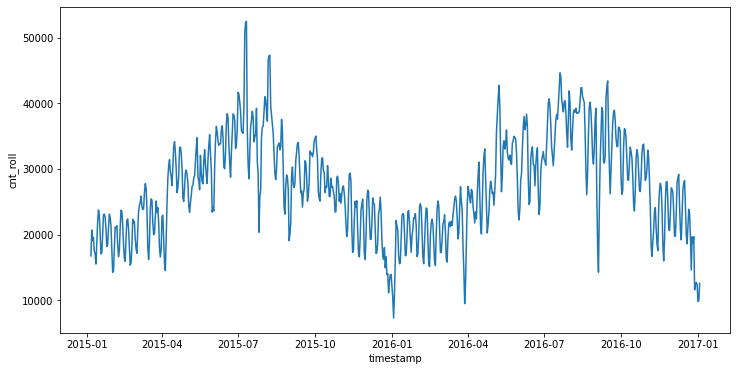

In [75]:
plt.figure(figsize=(12, 6))
sns.lineplot(data = df_resample, x='timestamp', y='cnt_roll')


Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее – примените функцию для подсчета стандартного отклонения. В качестве ответа введите полученное стандартное отклонение, округленное до 2 знаков после точки.



In [79]:
df_resample['diff'] = df_resample['cnt'] - df_resample['cnt_roll']

In [80]:
df_resample

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,cnt_roll,diff
0,2015-01-04,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0,NaN,NaN
1,2015-01-05,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0,NaN,NaN
2,2015-01-06,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0,16739.666667,3873.333333
3,2015-01-07,21064,171.5,103.5,1796.5,454.5,60.0,0.0,0.0,69.0,20683.000000,381.000000
4,2015-01-08,15601,234.0,187.0,1903.5,491.5,84.0,0.0,0.0,72.0,19092.666667,-3491.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2016-12-30,11566,78.5,25.5,2368.5,216.0,105.0,0.0,0.0,72.0,12682.000000,-1116.000000
727,2016-12-31,11424,178.5,121.0,2183.0,319.5,98.0,0.0,24.0,72.0,12347.333333,-923.333333
728,2017-01-01,6421,168.0,106.5,2122.5,339.0,150.0,0.0,24.0,72.0,9803.666667,-3382.666667
729,2017-01-02,11823,89.5,22.5,1995.5,268.0,29.0,24.0,0.0,72.0,9889.333333,1933.666667


In [81]:
std = np.std(df_resample['diff'])

In [83]:
round(std, 2)

4558.59

Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

upper_bound – верхняя граница; к скользящим средним прибавляем 2.576∗std
lower_bound – нижняя граница; вычитаем 2.576∗std
Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.

Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.

In [86]:
df_resample['upper_bound'] = df_resample['cnt_roll'] + 2.576 * std

In [87]:
df_resample['lower_bound'] = df_resample['cnt_roll'] - 2.576 * std

In [90]:
round(df_resample.tail(), 2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,cnt_roll,diff,upper_bound,lower_bound
726,2016-12-30,11566,78.5,25.5,2368.5,216.0,105.0,0.0,0.0,72.0,12682.00,-1116.00,24424.92,939.08
727,2016-12-31,11424,178.5,121.0,2183.0,319.5,98.0,0.0,24.0,72.0,12347.33,-923.33,24090.25,604.41
728,2017-01-01,6421,168.0,106.5,2122.5,339.0,150.0,0.0,24.0,72.0,9803.67,-3382.67,21546.59,-1939.25
729,2017-01-02,11823,89.5,22.5,1995.5,268.0,29.0,24.0,0.0,72.0,9889.33,1933.67,21632.25,-1853.59
730,2017-01-03,19436,81.5,-15.0,1953.5,454.5,56.0,0.0,0.0,72.0,12560.00,6876.00,24302.92,817.08


И наконец – изучим аномально высокие значения! Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.



In [93]:
df_resample.query('cnt > upper_bound').sort_values(by=['cnt'], ascending=False)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,cnt_roll,diff,upper_bound,lower_bound
186,2015-07-09,72504,427.0,421.0,1175.5,311.5,28.0,0.0,0.0,24.0,50705.000000,21799.000000,62447.919188,38962.080812
214,2015-08-06,63468,466.5,466.5,1625.0,357.5,50.0,0.0,0.0,24.0,46627.333333,16840.666667,58370.252521,34884.414146
721,2016-12-25,36653,300.0,300.0,1906.0,664.0,87.0,0.0,24.0,72.0,19650.666667,17002.333333,31393.585854,7907.747479
609,2016-09-04,27512,452.5,452.5,1676.5,561.5,71.0,0.0,24.0,48.0,14259.000000,13253.000000,26001.919188,2516.080812


Проделайте аналогичную операцию для дней, когда число аренд оказалось ниже ожидаемого. В чем может быть причина падения числа аренд 2016-09-02?



In [95]:
df_resample.query('cnt < lower_bound').sort_values(by=['cnt'])

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,cnt_roll,diff,upper_bound,lower_bound
607,2016-09-02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26086.333333,-26086.333333,37829.252521,14343.414146
314,2015-11-14,8898,270.0,235.0,1951.0,560.0,105.0,0.0,24.0,48.0,21037.333333,-12139.333333,32780.252521,9294.414146
678,2016-11-12,8990,214.0,180.0,1976.0,247.5,108.0,0.0,23.0,46.0,20878.000000,-11888.000000,32620.919188,9135.080812
130,2015-05-14,15609,237.5,189.5,2039.0,513.0,118.0,0.0,0.0,0.0,28709.333333,-13100.333333,40452.252521,16966.414146
201,2015-07-24,16034,380.5,380.5,1810.0,275.0,108.0,0.0,0.0,24.0,31013.666667,-14979.666667,42756.585854,19270.747479
615,2016-09-10,17080,460.0,460.0,1932.0,392.0,89.0,0.0,24.0,48.0,31262.000000,-14182.000000,43004.919188,19519.080812
232,2015-08-24,17400,380.0,380.0,2099.0,321.0,126.0,0.0,0.0,24.0,29529.333333,-12129.333333,41272.252521,17786.414146
621,2016-09-16,21967,416.0,416.0,1900.5,416.0,115.0,0.0,0.0,48.0,36193.333333,-14226.333333,47936.252521,24450.414146
189,2015-07-12,23240,444.5,444.5,1811.5,520.5,80.0,0.0,24.0,24.0,36036.666667,-12796.666667,47779.585854,24293.747479
